## **Training**

### **MLP**

In [42]:
train_block_id = list(range(0, 446))
val_block_id = list(range(446, 542))
test_block_id = list(range(542, 638))

df_FC = df[df['target'].notnull()].reset_index(drop=True)
tr = df_FC[df_FC['data_block_id'].isin(train_block_id)]
val = df_FC[df_FC['data_block_id'].isin(val_block_id)] 
test = df_FC[df_FC['data_block_id'].isin(test_block_id)] 
        
x_train = []
y_train = []
x_val = []
y_val = []

x_train_og = tr[features]
y_train_og = tr[target]
x_val_og = val[features]
y_val_og = val[target]
        
x_train = np.array(x_train_og).astype('float32')
y_train = np.array(y_train_og).astype('float32')
x_val = np.array(x_val_og).astype('float32')
y_val = np.array(y_val_og).astype('float32')
        
x_train = np.nan_to_num(x_train)
x_val = np.nan_to_num(x_val)

In [44]:
def train(x_train, y_train, x_val, y_val):
    
        model = {
            "model": None,
            "history": None,
            "y_pred": None}
        
        model['model'] = tf.keras.models.Sequential([
            tf.keras.layers.Dense(32, input_shape=(len(features),), activation='relu'),
            tf.keras.layers.Dense(64, input_shape=(len(features),), activation='relu'),
            tf.keras.layers.Dense(128, input_shape=(len(features),), activation='relu'),
            tf.keras.layers.Dense(256, input_shape=(len(features),), activation='relu'),
            #tf.keras.layers.Dense(32, activation='relu'),
            #tf.keras.layers.Dropout(0.1),
            #tf.keras.layers.Dense(64, activation='relu'),
            #tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(1)
        ])
        
        early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
        model['model'].compile(optimizer='adam', loss='mae', metrics=['mae'])
        model['history'] = model['model'].fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), callbacks=[early_stop])
        y_pred = model['model'].predict(x_val)
        model['y_pred'] = y_pred
        model['y_val'] = y_val
        
        return model, y_pred

model, y_pred = train(x_train, y_train, x_val, y_val)

Epoch 1/10
21945/21945 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 75.7255 - mae: 75.7255 - val_loss: 58.4502 - val_mae: 58.4502
Epoch 2/10
21945/21945 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 65.8195 - mae: 65.8195 - val_loss: 58.6419 - val_mae: 58.6419
Epoch 3/10
21945/21945 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 61.9429 - mae: 61.9429 - val_loss: 55.6603 - val_mae: 55.6603
Epoch 4/10
21945/21945 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 59.9411 - mae: 59.9411 - val_loss: 56.6496 - val_mae: 56.6496
Epoch 5/10
21945/21945 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 57.9355 - mae: 57.9355 - val_loss: 51.8805 - val_mae: 51.8805
Epoch 6/10
21945/21945 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 56.6737 - mae: 56.6737 - val_loss: 52.3089 - val_mae: 52.3089
Epoch 7/10
21945/21945 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 54.8558 - mae: 54.8558 - val_loss: 52.4393 - val_mae: 52.4393
Epoch 8/10
21945/21945 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 54.0191 - mae: 54.0191 - val_loss: 49.2324 - v

<Figure size 640x480 with 0 Axes>

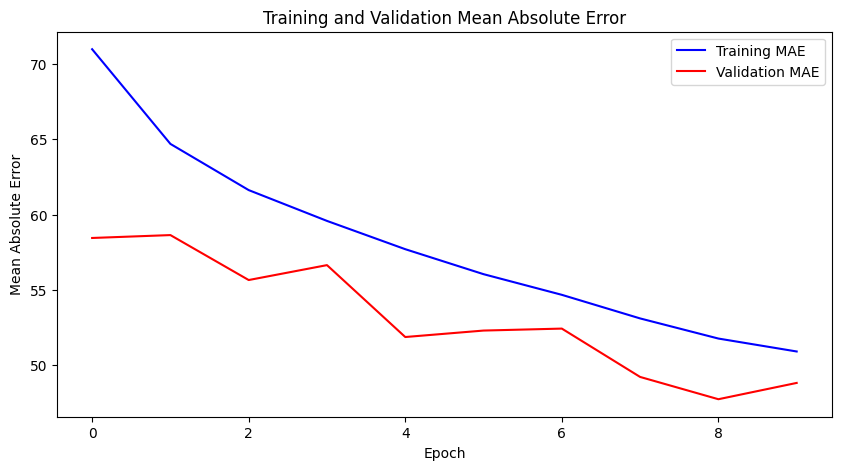

In [45]:
plt.figure()
plt.figure(figsize=(10, 5))
plt.plot(model["history"].history['mae'], 'b', label='Training MAE')
plt.plot(model["history"].history['val_mae'],'r', label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show() 

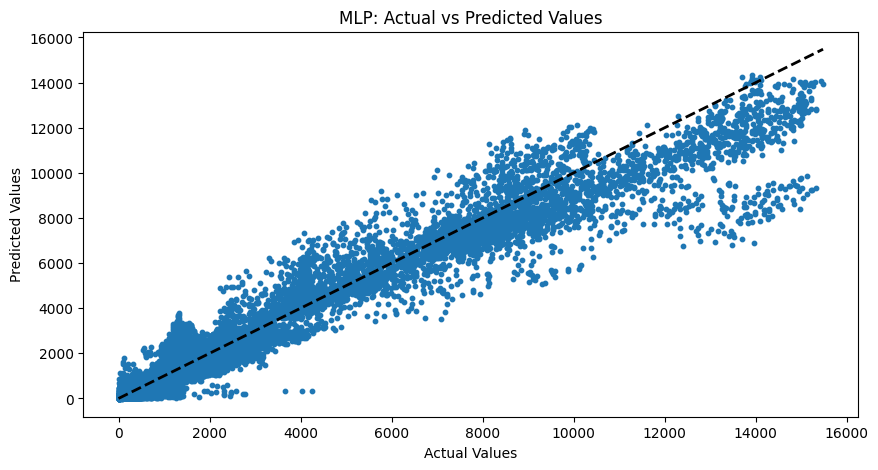

In [46]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_pred, s=10)  # Scatter plot for actual vs predictions
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.title('MLP: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

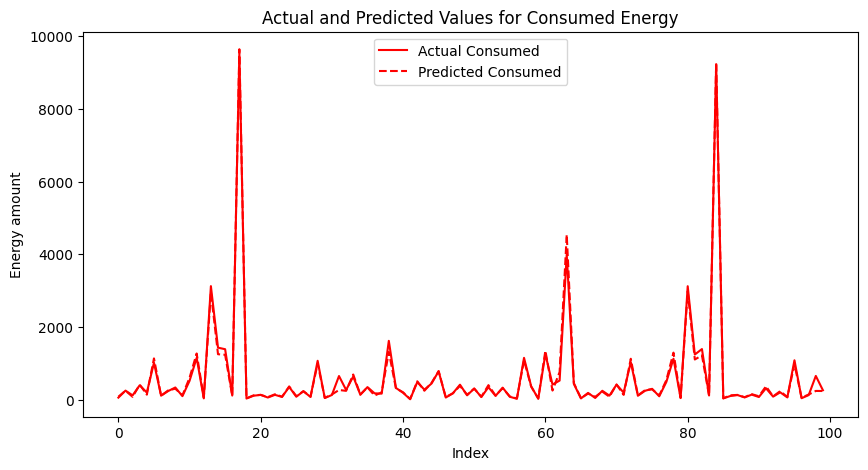

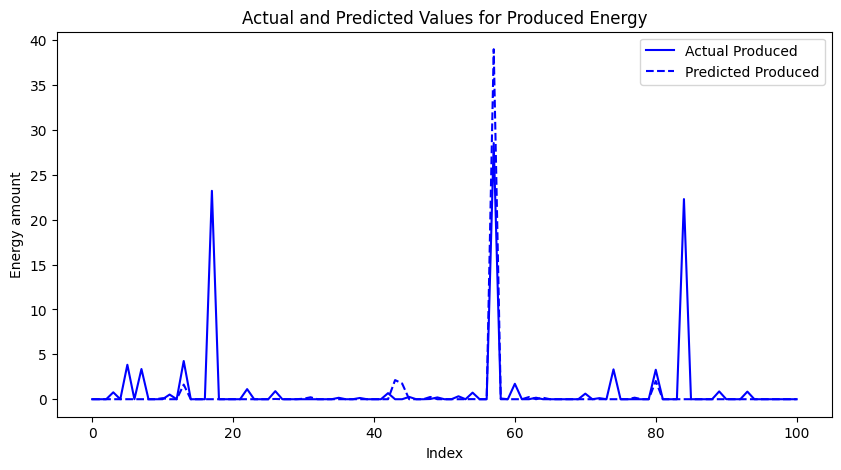

In [47]:
# Choose the range of indices to focus on
start_index = 90000  # Replace with your actual start index
end_index = 90200    # Replace with your actual end index

# Create a boolean mask for the consumed and produced energy within the specified range
indices = np.arange(len(y_val))

# Create boolean masks based on the conditions
consumed_range = (x_val_og['is_consumption'] == 1) & (indices >= start_index) & (indices <= end_index)
produced_range = (x_val_og['is_consumption'] == 0) & (indices >= start_index) & (indices <= end_index)

# Plot for consumed energy in the specified range
plt.figure(figsize=(10, 5))
plt.plot(y_val[consumed_range], 'r-', label='Actual Consumed')
plt.plot(y_pred[consumed_range], 'r--', label='Predicted Consumed')
plt.title('Actual and Predicted Values for Consumed Energy')
plt.xlabel('Index')
plt.ylabel('Energy amount')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_val[produced_range], 'b-', label='Actual Produced')
plt.plot(y_pred[produced_range], 'b--', label='Predicted Produced')
plt.title('Actual and Predicted Values for Produced Energy')
plt.xlabel('Index')
plt.ylabel('Energy amount')
plt.legend()
plt.show()